features: tensor([-0.5680,  0.0976]) 
label: tensor([2.7294])
tensor([[ 0.8273,  0.3357],
        [ 0.4031,  0.6437],
        [-0.2156, -0.4173],
        [-0.4117,  0.3923],
        [-1.0445,  1.3541],
        [-1.0287,  2.0930],
        [ 1.4613,  1.6654],
        [-1.6618,  0.5659],
        [ 1.0679,  0.8480],
        [ 0.9909,  0.0640]]) 
 tensor([[ 4.7295],
        [ 2.8158],
        [ 5.1830],
        [ 2.0473],
        [-2.5029],
        [-4.9672],
        [ 1.4625],
        [-1.0438],
        [ 3.4462],
        [ 5.9558]])


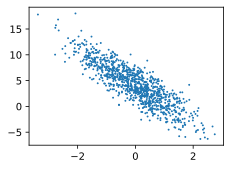

In [15]:
#spring recruit text one : write function to calculate four probability
%matplotlib inline
import random
import torch
from d2l import torch as d2l

def synthetic_data(w, b, num_examples): #@save
    #生成y=Xw+b+噪声
    X = torch.normal(0, 1, (num_examples, len(w))) 
    #使用torch.normal函数生成均值为0，标准差为1的随机张量X
    #(num_examples, len(w))表示生成的张量样本数为num_examples长度为w的
    y = torch.matmul(X, w) + b 
    #将X与权重向量w相乘后加上偏置项b得到标签y，matmul是pytorch中用于快速求向量乘积的函数
    y += torch.normal(0, 0.01, y.shape)
    #为y添加高斯噪声使数据具有实际意义
    return X, y.reshape((-1, 1))
    #返回的y形状为(-1, 1),意味着y的行数不确定，由张量的总元素数以及其他维度的大小来自动判读，y是一个列向量

true_w = torch.tensor([2, -3.4]) #设置的真实权重向量，即用于拟合数据的量
true_b = 4.2 #设定真实的偏置项，即用来控制模型预测的偏移量
features, labels = synthetic_data(true_w, true_b, 1000)
#生成包含1000个样本的特征向量和标签

print('features:', features[0], '\nlabel:', labels[0])
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1)

#定义一个data_iter函数，用于接收批量大小、特征矩阵和标签向量作为输入，生成大小为batch_size的小批量数据
def data_iter(batch_size, features, labels):
    #batch_size： 批大小   features：特征数据   labels：标签数据 
    num_examples = len(features)#确定数据大小
    indices = list(range(num_examples))#创建一个包含0到num_examples的整数列表，作为数据索引
    random.shuffle(indices)#随机打乱索引列表indices一边后后续随机获得小批量数据
    for i in range(0, num_examples, batch_size):#起始，终点，步长
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)]
        )#根据起始索引i和批量大小batch_size取出对应的索引范围，并将其转换为张量
        yield features[batch_indices], labels[batch_indices]
        #使用yield关键字生成小批量的特征数据和对应的标签数据
        #这意味着data_iter是一个生成器函数，每次调用yield会生成一个新的小批量数据并暂停直到下一次迭代

batch_size = 10
#设置批量大小为10
for X, y in data_iter(batch_size, features, labels):
#使用data_iter生成小批量数据并在每次迭代后的到一个特征数据X和标签数据y
    print(X, '\n', y)
    break

w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)#requires_grad=True表示需要求梯度，即偏导
#从均值为0标准差为1的正态分布中采样随机数来初始化权重
b = torch.zeros(1, requires_grad=True)#1x1的零矩阵